In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jaxquantum as jqt
import jaxquantum.circuits as jqtc
import jaxquantum.codes as jqtb
from jax import jit, grad, vmap
import jax.numpy as jnp
import numpy as np
from math import prod
import matplotlib.pyplot as plt

from tqdm import tqdm

import jax
import optax
import functools
import datetime

In [3]:
delta = 0.4
N = 50
gkp_qubit = jqtb.GKPQubit({"delta": delta, "N": N})
squeezing_level = 20*jnp.log10(jnp.exp(jnp.abs(jnp.log(delta))))
gkp_qubit_1 = gkp_qubit.basis["+z"]
gkp_qubit_2 = gkp_qubit.basis["-z"]

In [4]:
a = jqt.destroy(N)
jqt.overlap(gkp_qubit_2, a.dag() @ a)

Array(2.25572673+0.j, dtype=complex128)

/Users/phionx/Github/qc/EQuS/bosonic/jax/jaxquantum/jaxquantum/codes/base.py:300: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/Users/phionx/Github/qc/EQuS/bosonic/jax/jaxquantum/jaxquantum/codes/base.py:300: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


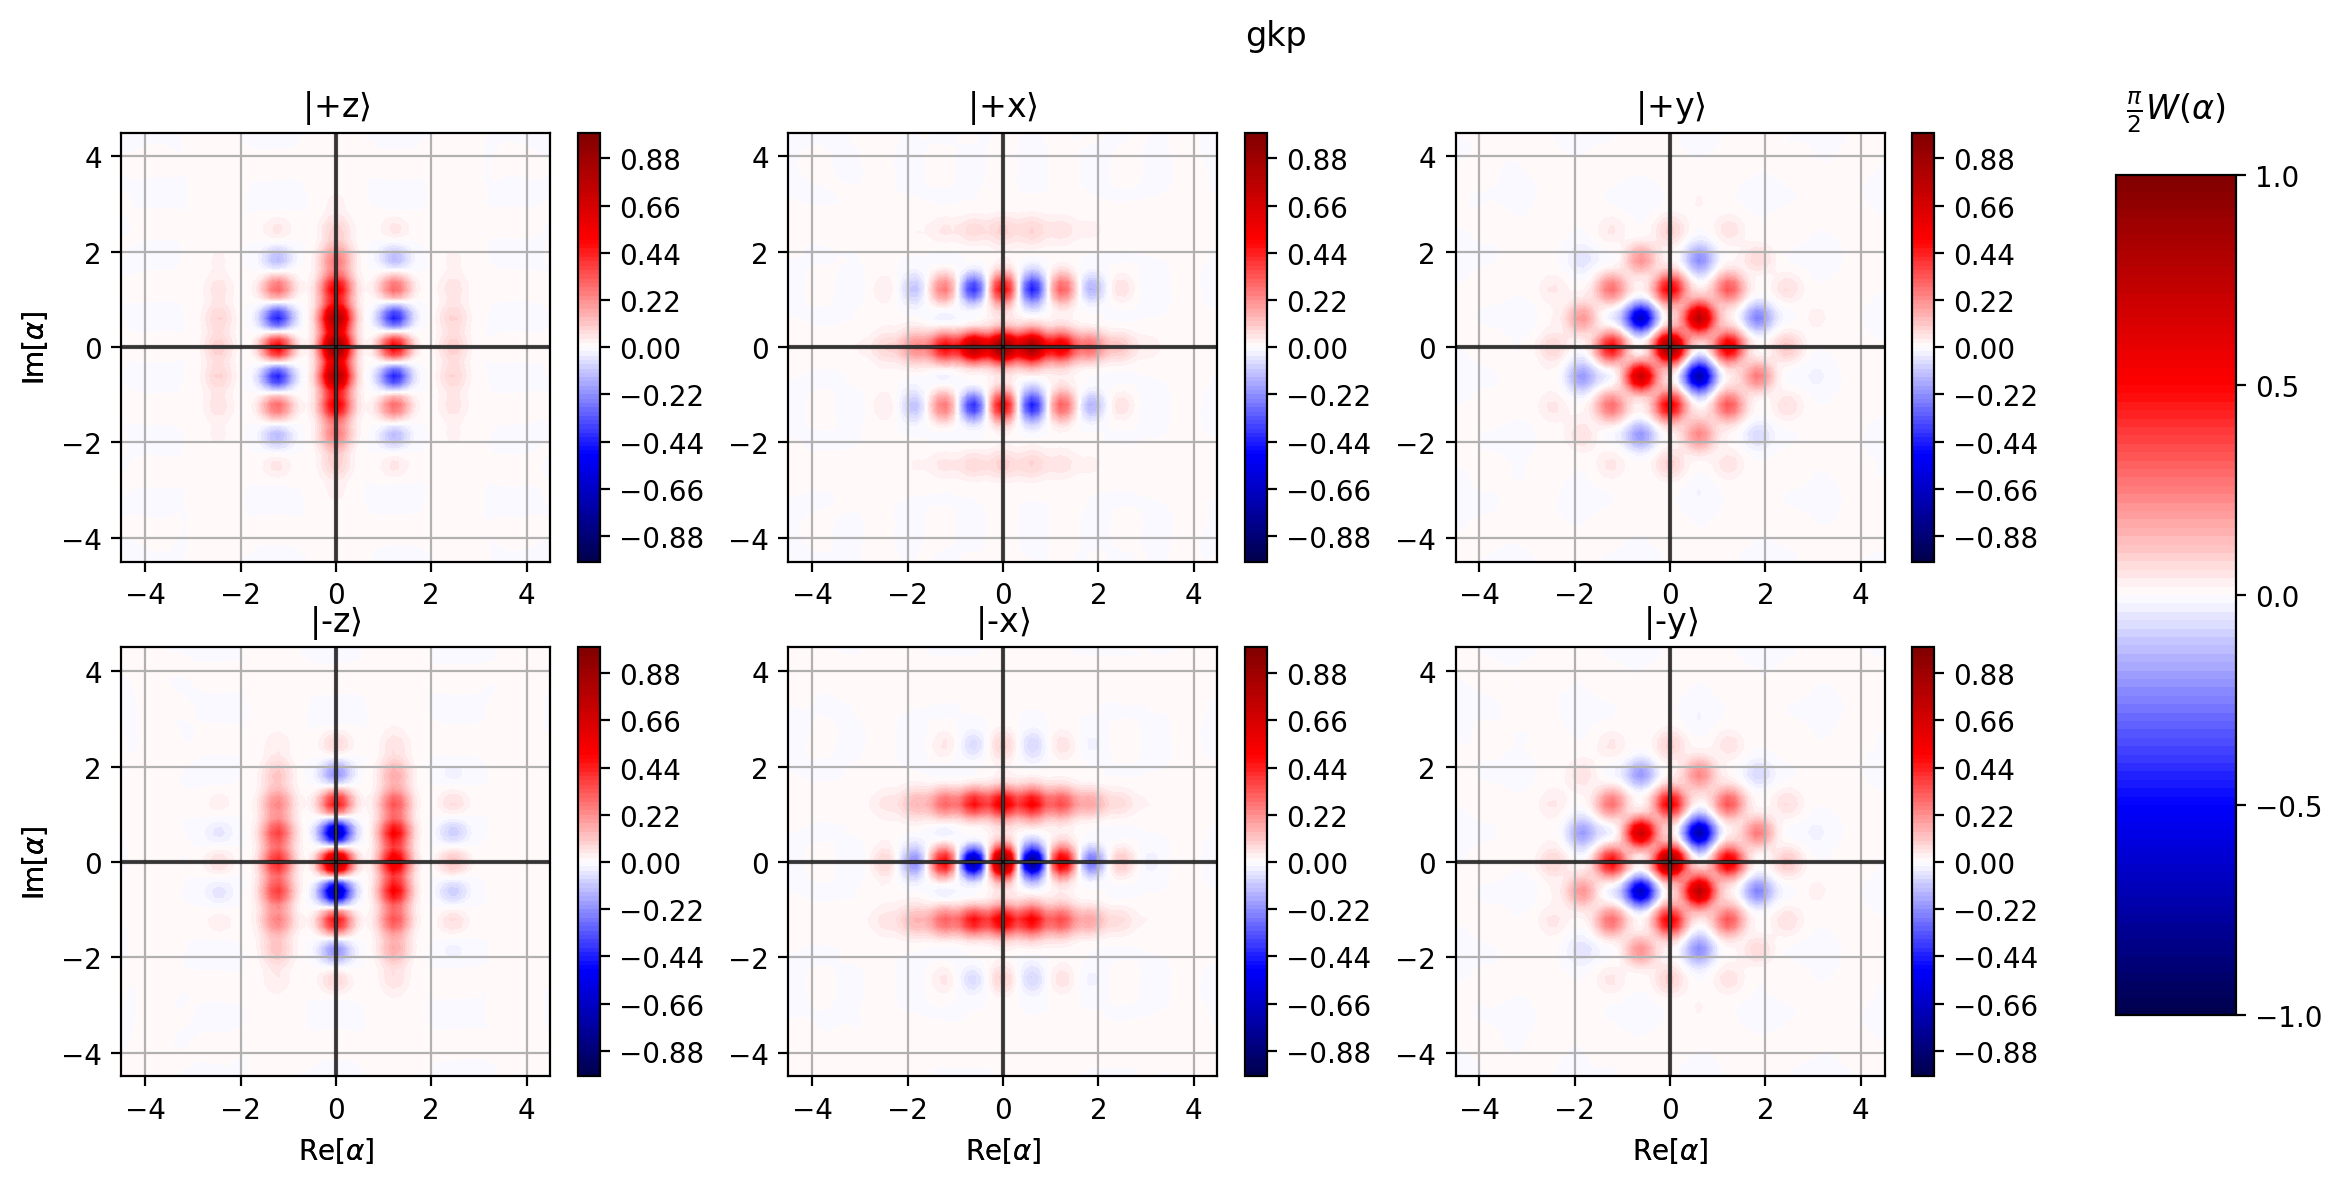

In [13]:
gkp_qubit.plot_code_states()

In [22]:
a = jqt.destroy(N)
b = jqt.destroy(N)

g_cd_0 = 2 * jnp.pi * 0.1
g_cd = g_cd_0 / jqt.overlap(b + b.dag(), gkp_qubit_2)
H = g_cd * (a.dag() @ a) ^ (b + b.dag())
# H -= jqt.overlap(gkp_qubit_1, a.dag() @ a) * (jqt.identity(N) ^ (b + b.dag()))

initial_state = gkp_qubit_1 ^ gkp_qubit_2

angle = jnp.pi/2 #jnp.sqrt(jnp.pi) / 2
tf = angle / g_cd_0

ts = jnp.linspace(0, tf, 100)
result = jqt.sesolve(H, initial_state, ts)

100% |██████████| [02:03<00:00,  1.24s/%]


Text(62.44444444444453, 0.5, 'Im[α]')

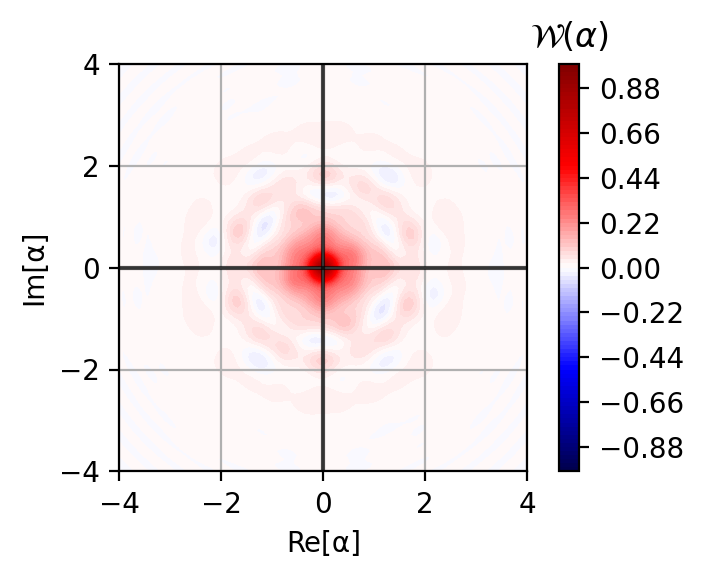

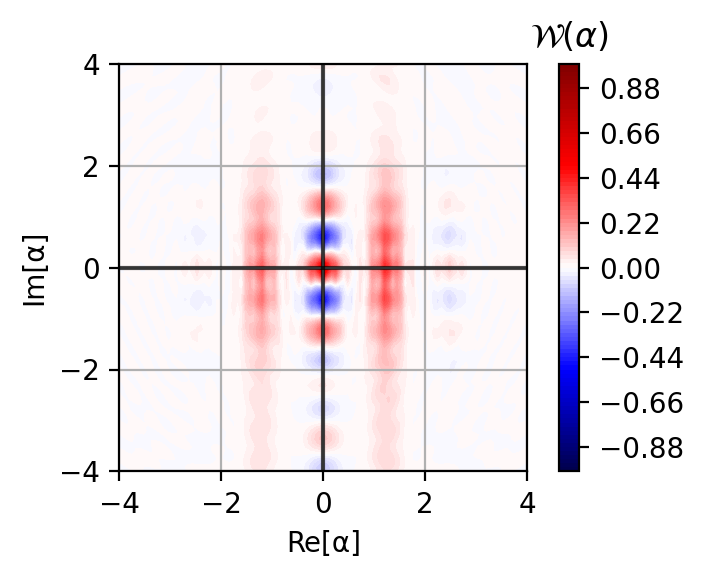

In [23]:
final_state_1 = result[-1].ptrace(0)
final_state_2 = result[-1].ptrace(1)


pts = jnp.linspace(-4,4, 101)
ax, im = jqt.plot_wigner(final_state_1, pts)
ax.set_xlabel("Re[α]")
ax.set_ylabel("Im[α]")

pts = jnp.linspace(-4,4, 101)
ax, im = jqt.plot_wigner(final_state_2, pts)
ax.set_xlabel("Re[α]")
ax.set_ylabel("Im[α]")